In [1]:
from model.sswae_hsic_multi import SSWAE_HSIC_MNIST as cur_model

In [2]:
import os, sys, configparser, logging, argparse
sys.path.append('/'.join(os.getcwd().split('/')[:-2]))

import warnings
warnings.filterwarnings("ignore")

from XAE.dataset import MNIST
from XAE.util import init_params, calculate_sharpness
from XAE.sampler import gaus
from XAE.logging_daily import logging_daily
import XAE.fid as fid

import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import import_module
from random import sample

In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

log = None
# logger = logging_daily('./config/log_info.yaml')
# log = logger.get_logging()
# log.setLevel(logging.INFO)

cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_1.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

### dim(Pz) = 8

In [4]:
mm.load('./%s' % (cfg['path_info']['save_path']))

In [5]:
batch_size = 100
test_data = MNIST(cfg['path_info']['data_home'], train = False, label = True)
test_generator = torch.utils.data.DataLoader(test_data, batch_size, num_workers = 5, shuffle = False, pin_memory=True, drop_last=True)
n = len(test_generator)

In [6]:
test_iter = iter(test_generator)

true_label = np.zeros(n*batch_size)
lab_t = torch.Tensor(range(10))
for i in range(n):
    img, lab = next(test_iter)
    true_label[(i*batch_size):((i+1)*batch_size)] = (lab_t*lab).sum(dim=1).detach().numpy()


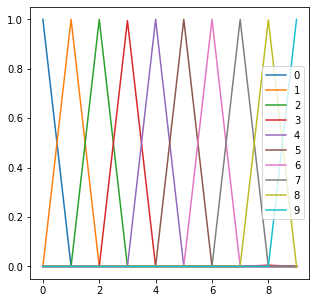

In [32]:
target = []
n = len(true_label)
for i in range(10):
    target_d = np.arange(n)[true_label == i]
    target.append(target_d[np.random.choice(target_d.shape[0], 1, replace = False)])

x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

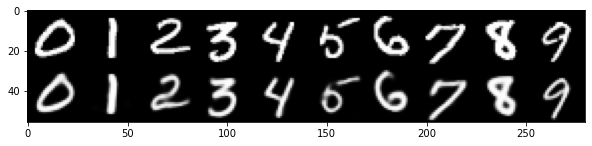

In [33]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

In [34]:
cumulated_data = []

cumulated_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

### dim(Pz) = 10

In [35]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_2.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

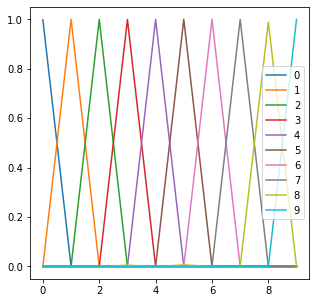

In [36]:
x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

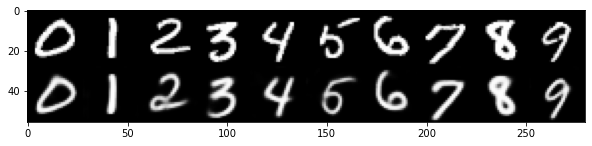

In [37]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

### dim(Pz) = 11

In [38]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_5.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

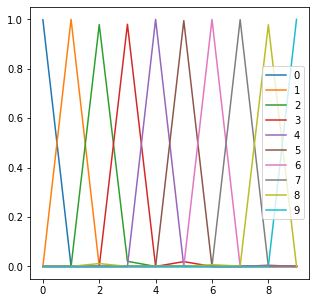

In [39]:
x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

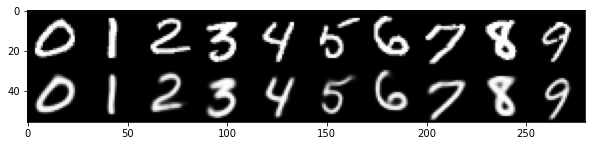

In [40]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

### dim(Pz) = 12

In [41]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_6.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

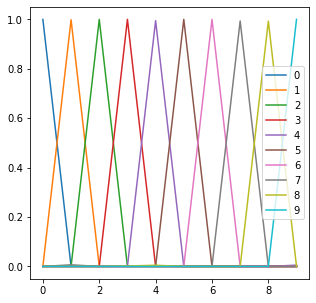

In [42]:
x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

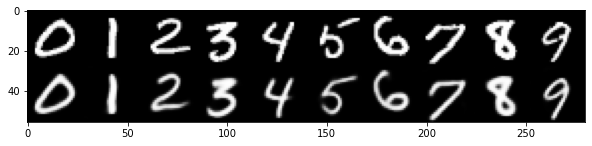

In [43]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

### dim(Pz) = 13

In [44]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_3.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

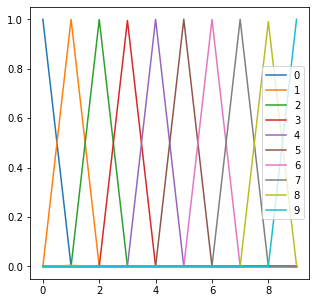

In [45]:
x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

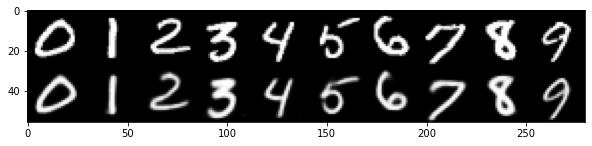

In [46]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

### dim(Pz) = 14

In [47]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_7.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

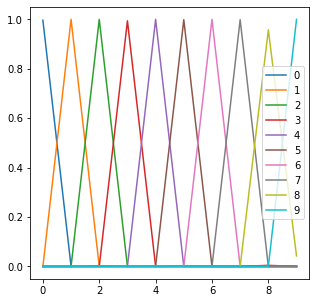

In [48]:
x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

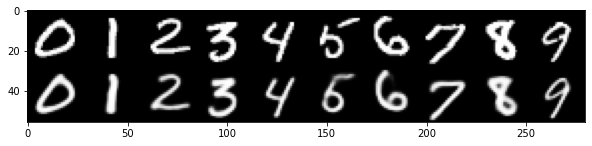

In [49]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

### dim(Pz) = 15

In [50]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_8.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

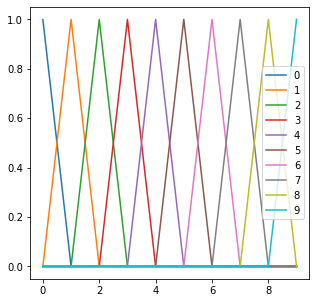

In [51]:
x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

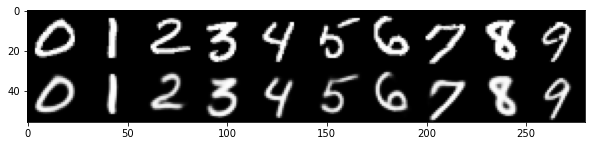

In [52]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

### dim(Pz) = 16

In [53]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_4.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

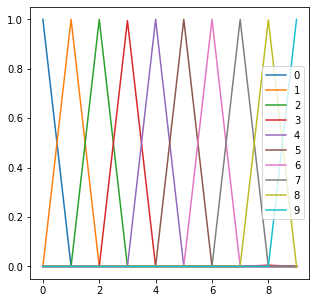

In [54]:
x = torch.Tensor(np.concatenate([np.array(test_data[i][0]) for i in target])).unsqueeze(1).to(device)
z = mm.encode(x)
recon = mm.decode(z).squeeze(1).detach().to('cpu').numpy()

fig, ax = plt.subplots(figsize = (5.0, 5.0))
for i in range(10):
    ax.plot(z[i, 0:mm.y_dim].detach().to('cpu').numpy(), label = "%s" % i)
plt.legend()
plt.show()

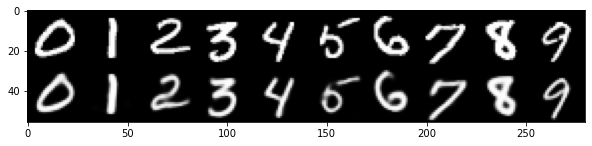

In [55]:
sample_data = []

sample_data.append(np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1))
sample_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))
sample_data = np.concatenate(sample_data, axis = 0)
cumulated_data.append(np.concatenate([recon[i,:,:] for i in range(10)], axis = 1))

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(sample_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

### test sample plot for Pz = (8, 10, 11, 12, 13, 14, 15, 16)

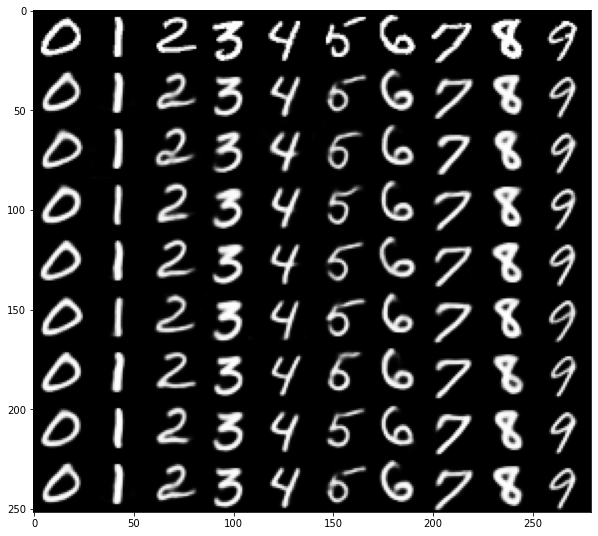

In [56]:
cumulated_data = np.concatenate(cumulated_data, axis = 0)

fig = plt.figure(figsize=(10.0,10.0))
plt.imshow(cumulated_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.show()

# Sample Generation

## 1. Exemplar Generation

In [92]:
exn = 5
zdim = 13

cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_multi_3.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

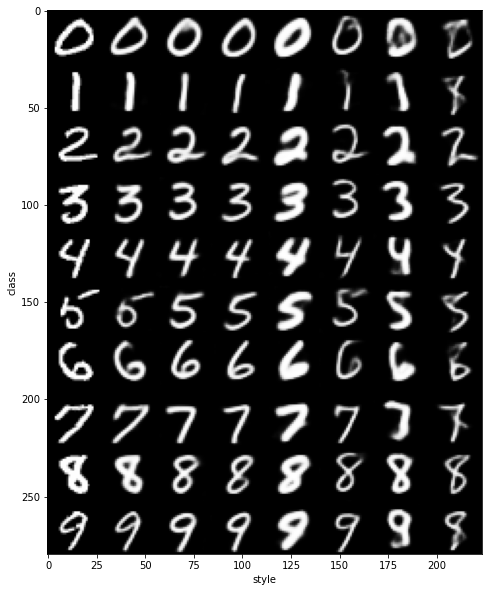

In [105]:
zz = torch.cat((torch.zeros(1,zdim), gaus(exn,zdim)), dim = 0).to(device)
# new_z = torch.cat((torch.from_numpy(np.eye(10)).type(torch.float32).repeat_interleave(exn + 1, dim = 0).to(device), zz.repeat((10, 1))), dim = 1)
new_z = torch.cat((z[:,0:mm.y_dim].repeat_interleave(exn + 1, dim = 0).to(device), zz.repeat((10, 1))), dim = 1)
new_x = mm.decode(new_z).squeeze(1).detach().to('cpu').numpy()

img_data = []
for i in range(10):
    img_data.append(np.concatenate([test_data[target[i]][0].numpy()[0,:,:]] + [recon[i,:,:]] + [new_x[(exn+1)*i + j] for j in range(exn+1)], axis = 1))
img_data = np.concatenate(img_data, axis = 0)

fig, ax = plt.subplots(figsize = (10.0, 10.0))
ax.imshow(img_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.xlabel('style')
plt.ylabel('class')
plt.show()

## 2. Style Transfer

In [167]:
cfg = configparser.ConfigParser()
cfg.read('./config/train_config_sswae_hsic_13_11.cfg')

mm = cur_model(cfg, log, device = device, verbose = 0)

mm.load('./%s' % (cfg['path_info']['save_path']))

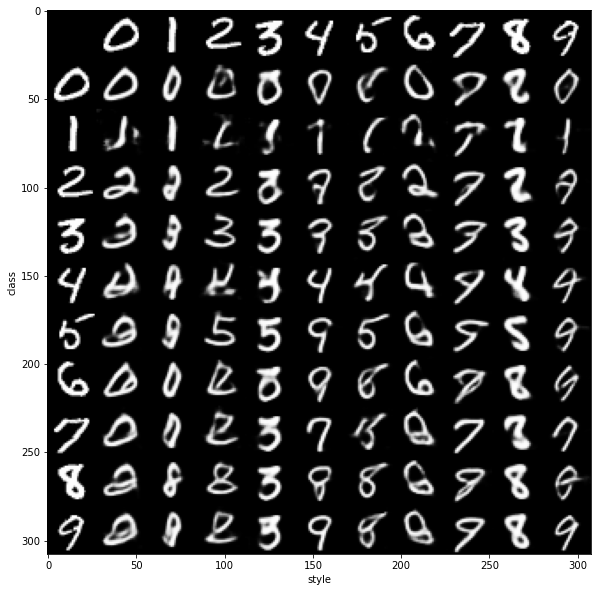

In [168]:
z = mm.encode(x)
new_z = torch.cat((z[:,:10].repeat_interleave(10, dim = 0), z[:,10:].repeat((10, 1))), dim = 1)
new_x = mm.decode(new_z).squeeze(1).detach().to('cpu').numpy()

img_data = np.ones((28*11, 28*11))*-1
img_data[:28,28:] = np.concatenate([test_data[i][0].numpy()[0,:,:] for i in target], axis = 1)
for i in range(10):
    img_data[((i+1)*28):((i+2)*28),:28] = test_data[target[i]][0].numpy()[0,:,:]
    img_data[((i+1)*28):((i+2)*28),28:] = np.concatenate(new_x[(10*i):(10*(i+1)),:,:], axis = 1)
    
fig, ax = plt.subplots(figsize = (10.0, 10.0))
ax.imshow(img_data, cmap = 'gray', vmin = -1.0, vmax = 1.0)
plt.xlabel('style')
plt.ylabel('class')
plt.show()